# Wine Quality Data Set
## Es 1:
Importare il dataset winequality-white_modified, indicare la dimensione del
dataset e valutare se il dataset è bilanciato rispetto la variabile qualità da
predire. Prendere confidenza del dataset calcolando misure descrittive dello
stesso e facendo dei plot.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data/winequality-white_modified.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.9958,3.32,0.60,9.5,0
1,6.0,0.27,0.28,4.8,0.063,31.0,201.0,0.9964,3.69,0.71,10.0,0
2,7.4,0.24,0.29,10.1,0.050,21.0,105.0,0.9962,3.13,0.35,9.5,0
3,7.4,0.18,0.30,8.8,0.064,26.0,103.0,0.9961,2.94,0.56,9.3,0
4,6.7,0.54,0.28,5.4,0.060,21.0,105.0,0.9949,3.27,0.37,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4493,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.9990,3.14,0.46,8.9,2
4494,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.9990,3.14,0.46,8.9,2
4495,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.9990,3.14,0.46,8.9,2
4496,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.9990,3.14,0.46,8.9,2


In [3]:
df.shape[0]

4498

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.groupby("quality")["pH"].count()

quality
0    1440
1    2098
2     960
Name: pH, dtype: int64

<AxesSubplot:>

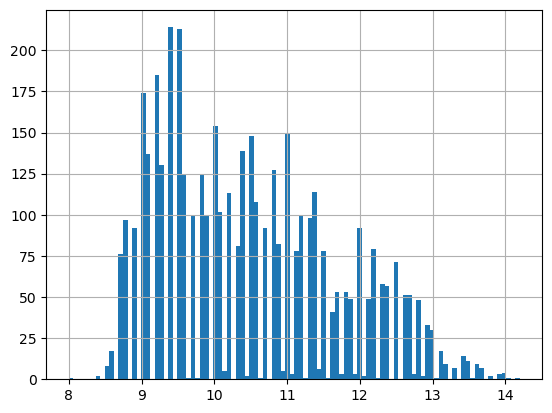

In [13]:
df["alcohol"].hist(bins=100)

<AxesSubplot:>

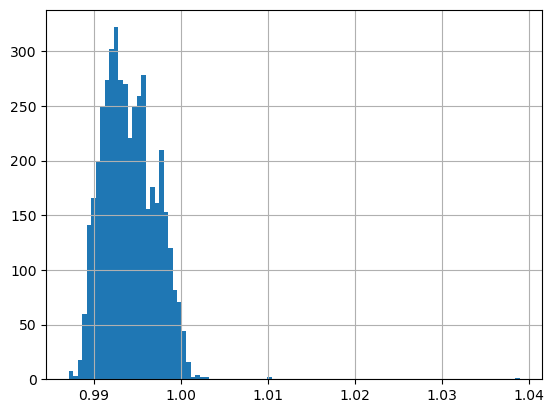

In [14]:
df["density"].hist(bins=100)

In [16]:
datas = []
df_quality_1 = df.loc[df.quality == 1]
datas.append(df_quality_1["alcohol"])
df_quality_0 = df.loc[df.quality == 0]
datas.append(df_quality_0["alcohol"])
df_quality_2 = df.loc[df.quality == 2]
datas.append(df_quality_2["alcohol"])

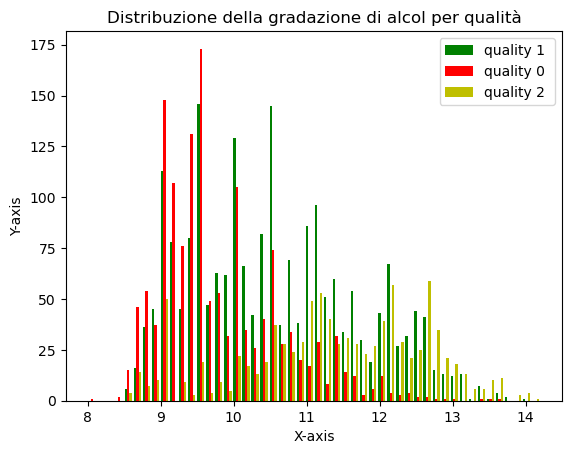

In [18]:
import matplotlib.pyplot as plt
plt.hist(datas, bins=50,color=['g','r','y'],label=['quality 1 ','quality 0','quality 2'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Distribuzione della gradazione di alcol per qualità")
plt.legend()

# Es 2:
Selezionare il modello KNN e valutare un dataset rispetto a un training che si
compone di 2/3 delle istanze. Comparare I risultati di accuratezza ottenuti
con un 10 cross fold validation. Comparare con uno stimatore dummy con
strategia most_frequent. Visualizzare la confusion matrix per vedere se
l’errore è localizzato in una classe particolare

In [26]:
new_df = df.copy()

In [28]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.dummy import  DummyClassifier
from sklearn.model_selection import train_test_split,cross_val_score
y = new_df["quality"]
new_df.drop("quality", axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=1/3, random_state=0)

In [29]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = model.predict(train_data)
    test_preds = model.predict(test_data)
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))


In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


classifiers = [KNeighborsClassifier(), DummyClassifier(strategy="most_frequent")]
names = ["KNN", "dummy"]

scores = cross_val_score(classifiers[0], new_df, y, cv=10)
print(f"Accuracy  of Cross validate KNN: ",scores.mean())
print(scores)
print("=======================")


for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

Accuracy  of Cross validate KNN:  0.4522024251422915
[0.42666667 0.45777778 0.43555556 0.47555556 0.43777778 0.46
 0.46666667 0.45111111 0.48552339 0.42538976]
 ===== KNN =====
Accuracy on train 0.6727818545697132
Accuracy on test 0.4846666666666667
Confusion matrix on test
[[236 226  35]
 [201 398  83]
 [ 58 170  93]]
 ===== dummy =====
Accuracy on train 0.4723148765843896
Accuracy on test 0.45466666666666666
Confusion matrix on test
[[  0 497   0]
 [  0 682   0]
 [  0 321   0]]


I vini di qualità 2 sono i più difficile da predire corettamente

# Es 3:
Scalare tutte le variabili in modo che siano in un intervallo 0-1 e normalizzare
usando la funzione normalizer. Verificare se il nuovo setting migliora i
risultati, rispetto il train/test split precedente.

In [33]:
from sklearn.preprocessing import  Normalizer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizer = Normalizer()

df_scaled = scaler.fit_transform(new_df)

In [35]:
df_norma = normalizer.fit_transform(df_scaled)
df_norma

array([[0.24539319, 0.21147255, 0.11786757, ..., 0.46401621, 0.3758891 ,
        0.20581364],
       [0.15915897, 0.16152959, 0.12690879, ..., 0.66346929, 0.4286861 ,
        0.24270576],
       [0.45693422, 0.23864989, 0.23060804, ..., 0.492012  , 0.19953975,
        0.31936263],
       ...,
       [0.35321319, 0.13107644, 0.17470278, ..., 0.36909933, 0.2697736 ,
        0.14032578],
       [0.35321319, 0.13107644, 0.17470278, ..., 0.36909933, 0.2697736 ,
        0.14032578],
       [0.35321319, 0.13107644, 0.17470278, ..., 0.36909933, 0.2697736 ,
        0.14032578]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_norma, y, test_size=1/3, random_state=0)

scores = cross_val_score(classifiers[0], df_norma, y, cv=10)
print(f"Accuracy  of Cross validate KNN: ",scores.mean())
print(scores)
print("=======================")


for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

Accuracy  of Cross validate KNN:  0.524243999010146
[0.47777778 0.50222222 0.51555556 0.49555556 0.52666667 0.52888889
 0.53555556 0.56222222 0.59910913 0.49888641]
 ===== KNN =====
Accuracy on train 0.7194796531020681
Accuracy on test 0.6
Confusion matrix on test
[[307 172  18]
 [151 425 106]
 [ 17 136 168]]
 ===== dummy =====
Accuracy on train 0.4723148765843896
Accuracy on test 0.45466666666666666
Confusion matrix on test
[[  0 497   0]
 [  0 682   0]
 [  0 321   0]]


# Es 4:
Provare alcune configurazioni di numero di neighbors e di weights per cercare
di migliorare i risultati

In [37]:
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": [3,5,10,20], "weights" : ("uniform", "distance")}

gs = GridSearchCV(classifiers[0],params)

test_model("GridSearch  KNN",gs, X_train, X_test, y_train, y_test)

 ===== GridSearch  KNN =====
Accuracy on train 1.0
Accuracy on test 0.68
Confusion matrix on test
[[324 161  12]
 [ 92 506  84]
 [  5 126 190]]


In [38]:
gs.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [39]:
classifiers[0].set_params(**gs.best_params_)

test_model("KNN with best params",classifiers[0], X_train, X_test, y_train, y_test)

 ===== KNN with best params =====
Accuracy on train 1.0
Accuracy on test 0.68
Confusion matrix on test
[[324 161  12]
 [ 92 506  84]
 [  5 126 190]]


# Es 5:
Provare il modello ottenuto sul file winequality-white_modified_production e
valutare i risultati ottenuti
Extra fare una pipeline con questo modello

In [40]:
df_production = pd.read_csv("Data/winequality-white_modified_production.csv",sep=";")
df_production

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.41,0.18,3.5,0.027,23.0,109.0,0.99018,3.34,0.54,12.8,2
1,6.8,0.37,0.28,1.9,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,2
2,7.7,0.40,0.27,4.5,0.034,27.0,95.0,0.99175,3.21,0.59,12.3,2
3,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,2
4,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.9,0.19,0.35,5.0,0.067,32.0,150.0,0.99500,3.36,0.48,9.8,0
396,7.0,0.47,0.07,1.1,0.035,17.0,151.0,0.99100,3.02,0.34,10.5,0
397,6.2,0.35,0.03,1.2,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,0
398,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,0


In [41]:
y = df_production.quality
X  = df_production.drop("quality",axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.3,0.41,0.18,3.5,0.027,23.0,109.0,0.99018,3.34,0.54,12.8
1,6.8,0.37,0.28,1.9,0.024,64.0,106.0,0.98993,3.45,0.60,12.6
2,7.7,0.40,0.27,4.5,0.034,27.0,95.0,0.99175,3.21,0.59,12.3
3,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4
4,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4
...,...,...,...,...,...,...,...,...,...,...,...
395,6.9,0.19,0.35,5.0,0.067,32.0,150.0,0.99500,3.36,0.48,9.8
396,7.0,0.47,0.07,1.1,0.035,17.0,151.0,0.99100,3.02,0.34,10.5
397,6.2,0.35,0.03,1.2,0.064,29.0,120.0,0.99340,3.22,0.54,9.1
398,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.99200,3.14,0.42,9.8


In [42]:
from sklearn.pipeline import Pipeline

model_knn = KNeighborsClassifier(n_neighbors=20,weights="distance")

pipeline_trasform = Pipeline(steps=[("scaler",scaler),("norma",normalizer)],verbose=True)

my_pipeline = Pipeline(steps=[("preporcessing",pipeline_trasform), ("model",model_knn)],verbose=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

test_model("KNN model in production",my_pipeline, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing norma, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preporcessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
 ===== KNN model in production =====
Accuracy on train 1.0
Accuracy on test 0.7910447761194029
Confusion matrix on test
[[50  6  9]
 [ 2 25  6]
 [ 1  4 31]]
